In [1]:
#importing the necessary python libraries 

import os
import pandas as pd
import numpy as np
import datetime as dt

import string
import re 
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
#nltk.download('stopwords')
#nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer #what's the problem with this vectorizer?
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix

import seaborn as sn

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as style
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
plt.style.use('fivethirtyeight')
#setting the resolution for graphs
#mpl.rcParams['figure.dpi']= 300

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
#changing the user directory
os.chdir('C:\\Users\\Cafral\\Desktop\\Trump project')

#importing the data
trump_tweets = pd.read_csv('trump_tweets.txt',sep=",|\n,")

#removing if nan value encountered in any column
trump_tweets = trump_tweets.dropna()

#declaring the date
trump_tweets['date_time'] = trump_tweets['created_at'].apply(lambda x:dt.datetime.strptime(str(x),'%m-%d-%Y %H:%M:%S'))

#sorting by date
trump_tweets = trump_tweets.sort_values(['date_time'])

#date time feature engineering
trump_tweets['date'] = pd.to_datetime(trump_tweets['date_time'].dt.date)
trump_tweets['day'] = trump_tweets['date_time'].dt.day
trump_tweets['dow'] = trump_tweets['date_time'].dt.weekday
trump_tweets['month'] = trump_tweets['date_time'].dt.month
trump_tweets['year'] = trump_tweets['date_time'].dt.year
trump_tweets['hour'] = trump_tweets['date_time'].dt.hour

#election year feature engineering
trump_tweets['PostCampaignLaunchDummy'] = trump_tweets['date_time']>='2015-06-16'

#create variable to tag each tweet
trump_tweets['tweet_tag'] =1

C:\Users\Cafral\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [3]:
#creating deciles for retweets
trump_tweets['retweetDeciles']= pd.qcut(trump_tweets['retweet_count'],10,labels=False)

#creating quintiles for favorites
trump_tweets['favouriteDeciles'] = pd.qcut(trump_tweets['favorite_count'].astype(int),10,labels=False,duplicates='drop')

In [4]:
trump_tweets = trump_tweets.drop(trump_tweets[(trump_tweets['source'] == 'Twitter QandA')\
                                              | (trump_tweets['source'] == 'Periscope')\
                                              | (trump_tweets['source'] == 'Twitter Media Studio')\
                                              |(trump_tweets['source'] == 'Vine - Make a Scene')].index)

#resetting index
trump_tweets = trump_tweets.reset_index()

# number of tweets by hour

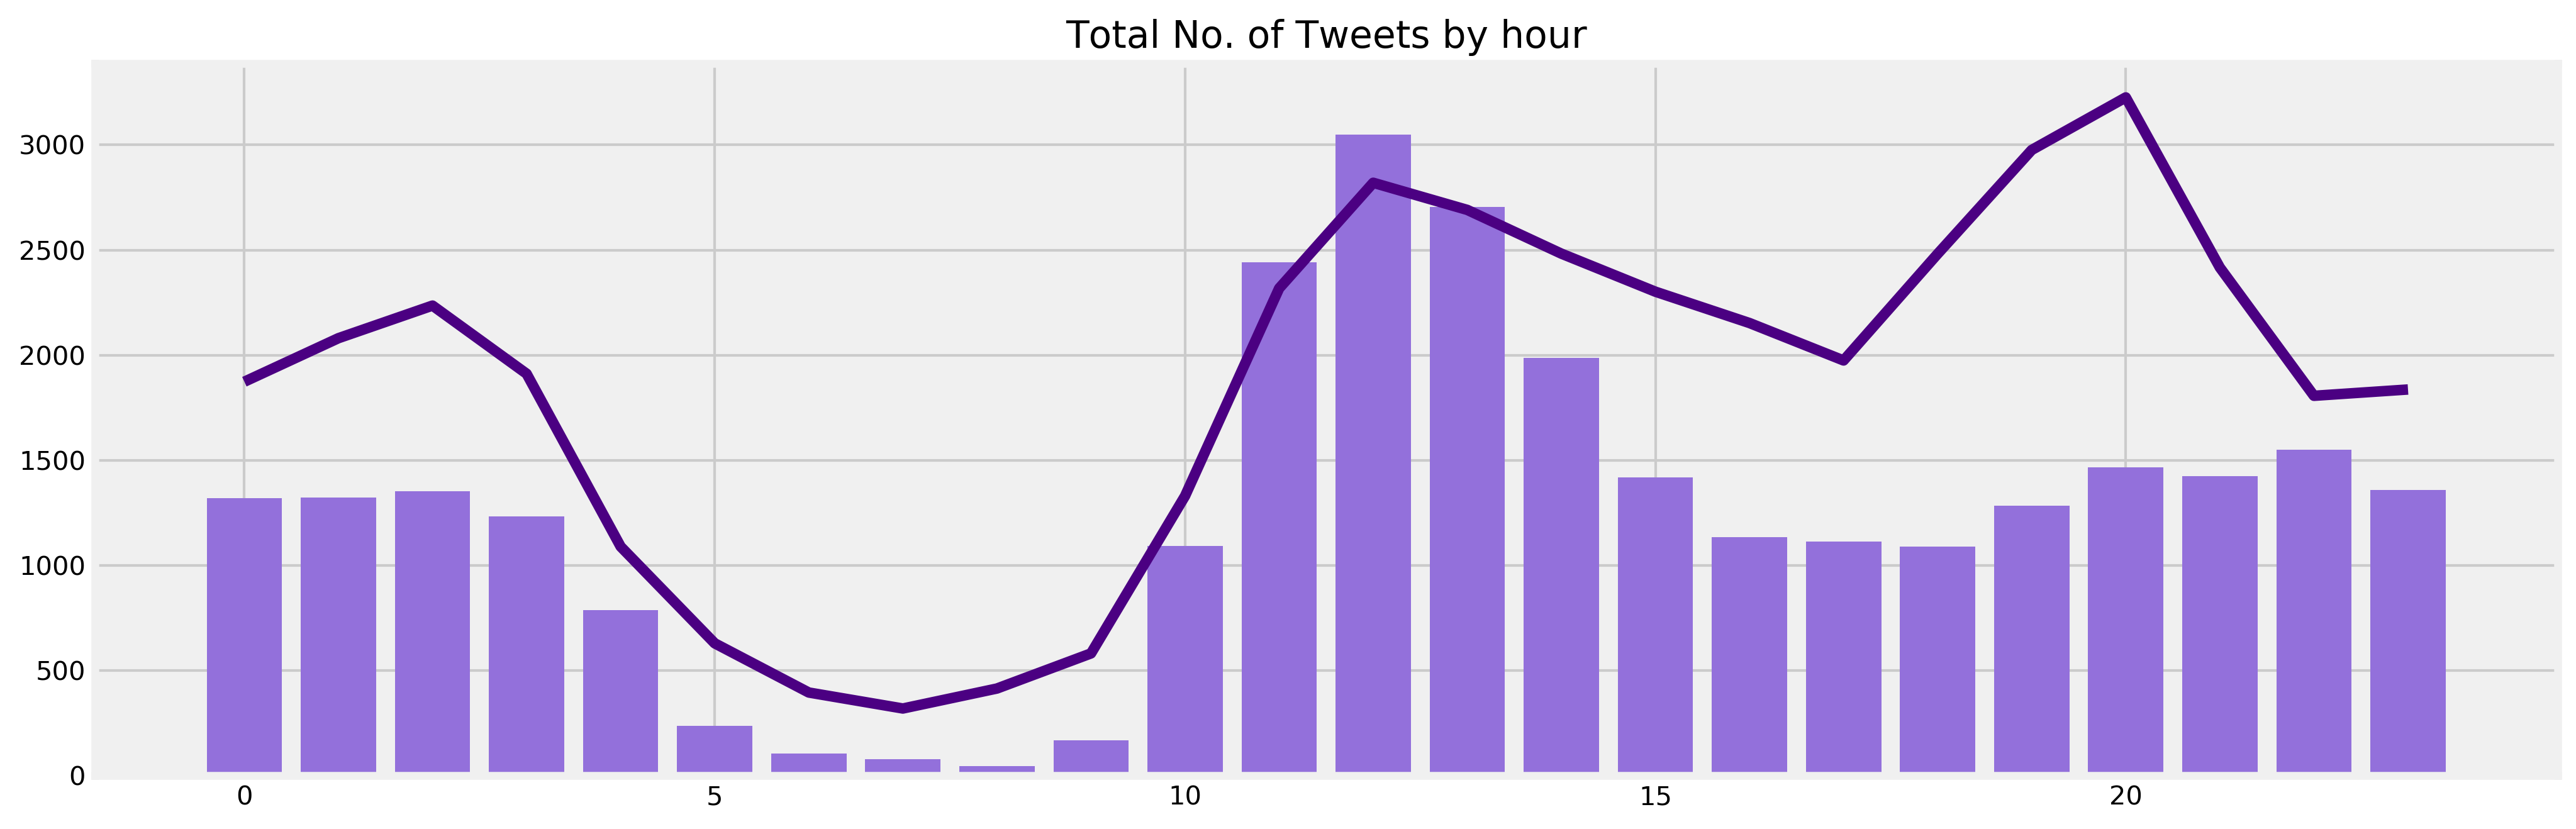

In [5]:
numTweetsByHour = trump_tweets.groupby(['hour'], as_index=False)['tweet_tag','retweet_count','favorite_count'].sum()

with mpl.rc_context({'figure.dpi': 300}):
    f, ax = plt.subplots(figsize=(15,5))
    plt.plot(numTweetsByHour['hour'],numTweetsByHour['tweet_tag'],color='indigo')#,color='green',alpha=0.5
    plt.bar(numTweetsByHour['hour'],numTweetsByHour['retweet_count']/10000,color='mediumpurple')#,color='green',alpha=0.5
    plt.title('Total No. of Tweets by hour')
    plt.show()

# Number of tweets by hour across years

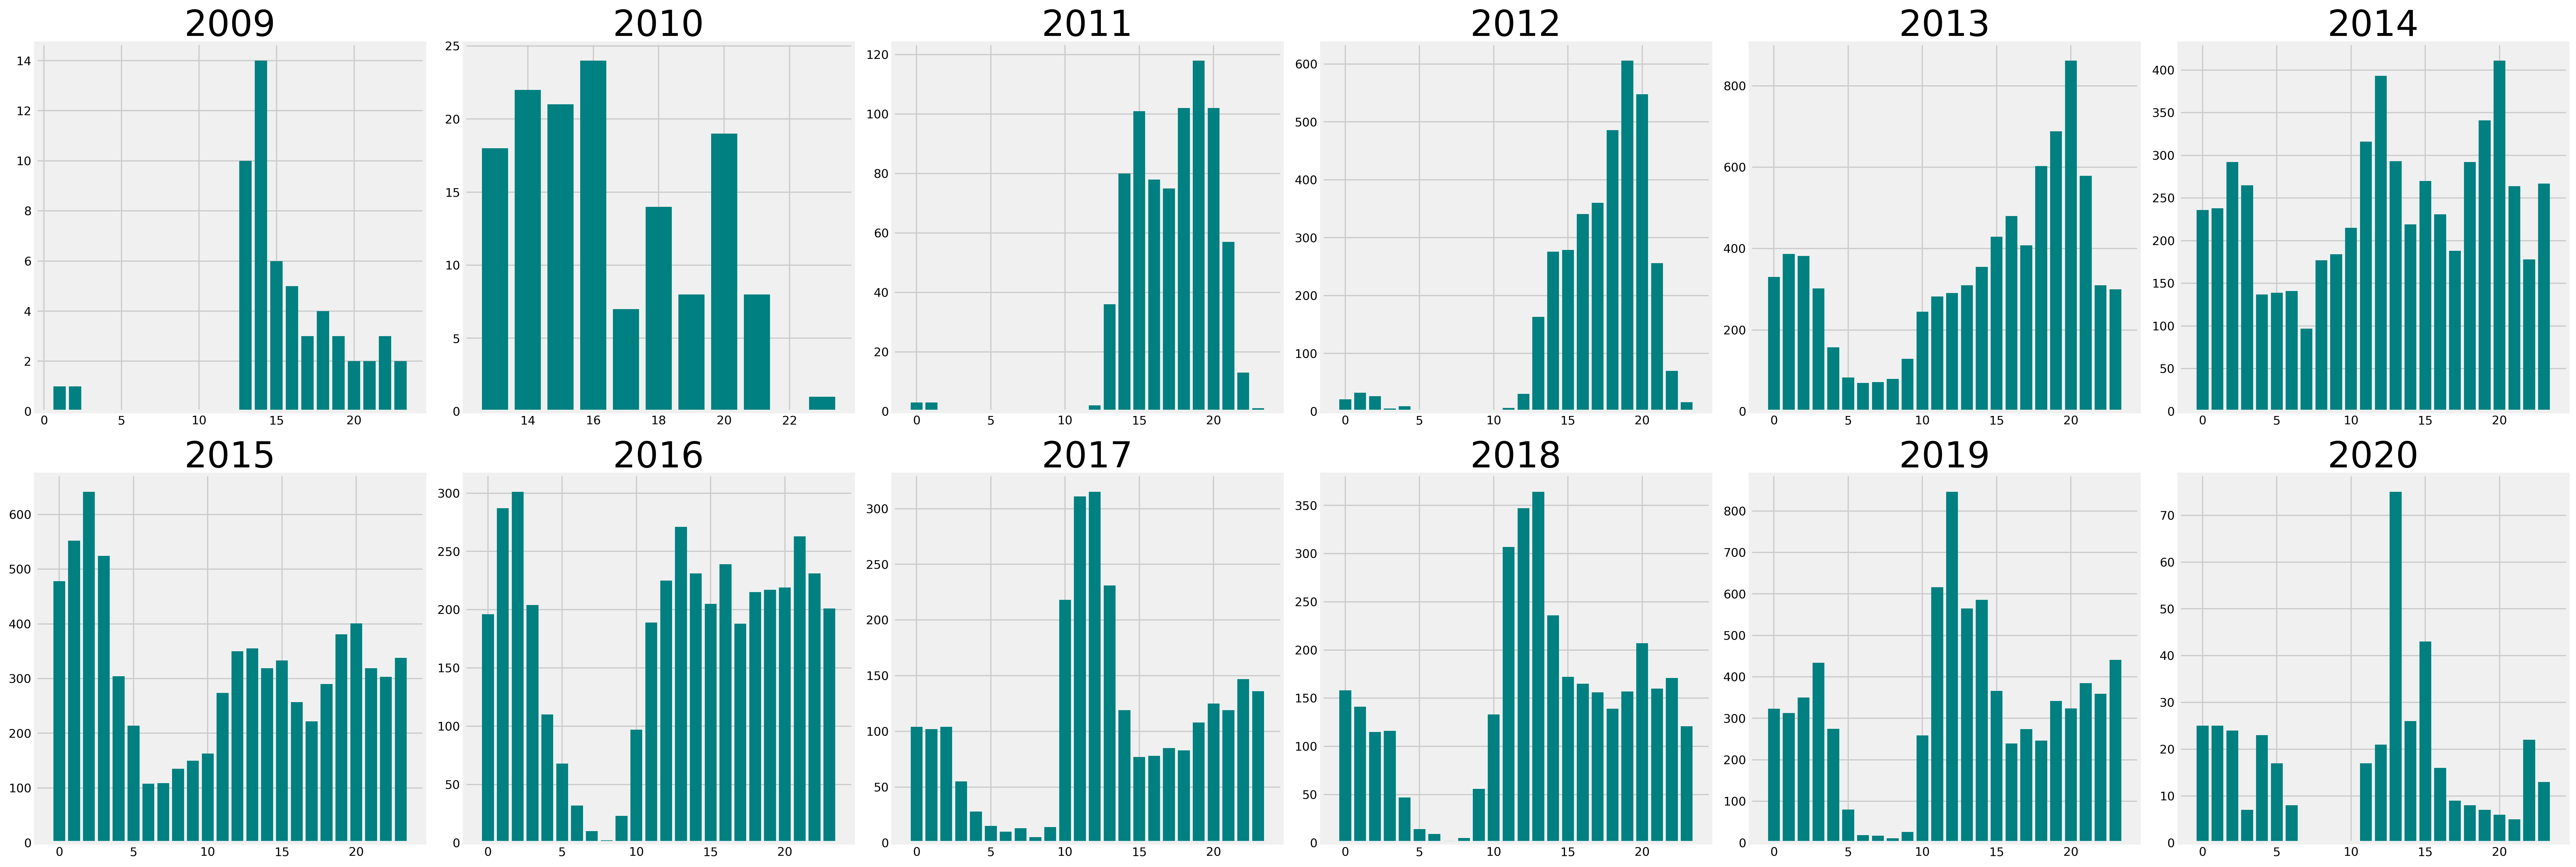

In [6]:
numTweetsByHour = trump_tweets.groupby(['hour','year'], as_index=False)['tweet_tag','retweet_count','favorite_count'].sum()
numTweetsByHour = numTweetsByHour.sort_values(['year','hour'])

with mpl.rc_context({'figure.dpi': 300}):
    f = plt.figure(figsize=(30,30))
    y = 1
    for year in numTweetsByHour['year'].unique():
        axis = f.add_subplot(6,6,y)
        axis.bar(numTweetsByHour['hour'][numTweetsByHour['year']==year],numTweetsByHour['tweet_tag'][numTweetsByHour['year']==year],color='teal')
        axis.set_title(year,size =30)
        y = y+1

    plt.tight_layout()
    plt.show()